# Generar Data

Malla de 50x50 con dos moléculas de agua distribuidas en la malla

In [1]:
import numpy as np
import pandas as pd

#distribución de carga gaussiana
def carga_gaussiana(x, y, x0, y0, sigma, charge):
   
    return charge * np.exp(-((x - x0)**2 + (y - y0)**2) / (2 * sigma**2))

#malla 100x100 con cargas de dos moléculas de agua.
def malla(size=30):
    
    x = np.linspace(0, 10, size)
    y = np.linspace(0, 10, size)
    xx, yy = np.meshgrid(x, y)
    
    # Inicializar la malla de carga
    malla = np.zeros((size, size))
    
    # Parámetros de los átomos
    sigma = 0.3
    q_h = +1.0  # Carga del hidrógeno (positiva)
    q_o = -2.0  # Carga del oxígeno (negativa, balancea 2H)
    
    # Molécula 1
    malla += carga_gaussiana(xx, yy, 3.0, 5.0, sigma, q_h)  # H1
    malla += carga_gaussiana(xx, yy, 3.7, 4.3, sigma, q_h)  # H2
    malla += carga_gaussiana(xx, yy, 3.35, 4.65, sigma, q_o)  # O
    
    # Molécula 2
    # 
    malla += carga_gaussiana(xx, yy, 7.0, 5.0, sigma, q_h)  # H1
    malla += carga_gaussiana(xx, yy, 7.7, 4.3, sigma, q_h)  # H2
    malla += carga_gaussiana(xx, yy, 7.35, 4.65, sigma, q_o)  # O
    
    return malla

if __name__ == "__main__":
    malla = malla(50)
    
    # Guardar como CSV con pandas (opción 1)
    df = pd.DataFrame(malla)
    df.to_csv("distribucion_carga1.csv", index=False, header=False, float_format="%.4f")
    
  
    
    print("Malla de cargas guardada en 'distribucion_carga1.csv'")

Malla de cargas guardada en 'distribucion_carga1.csv'


# Visualizar malla cargada

En el primer gráfico observamos la distribución de las cargas en la malla. El segundo gráfico corresponde a como debería verse el potencial en 3D. El último corresponde a las líneas de contorno del potencial.

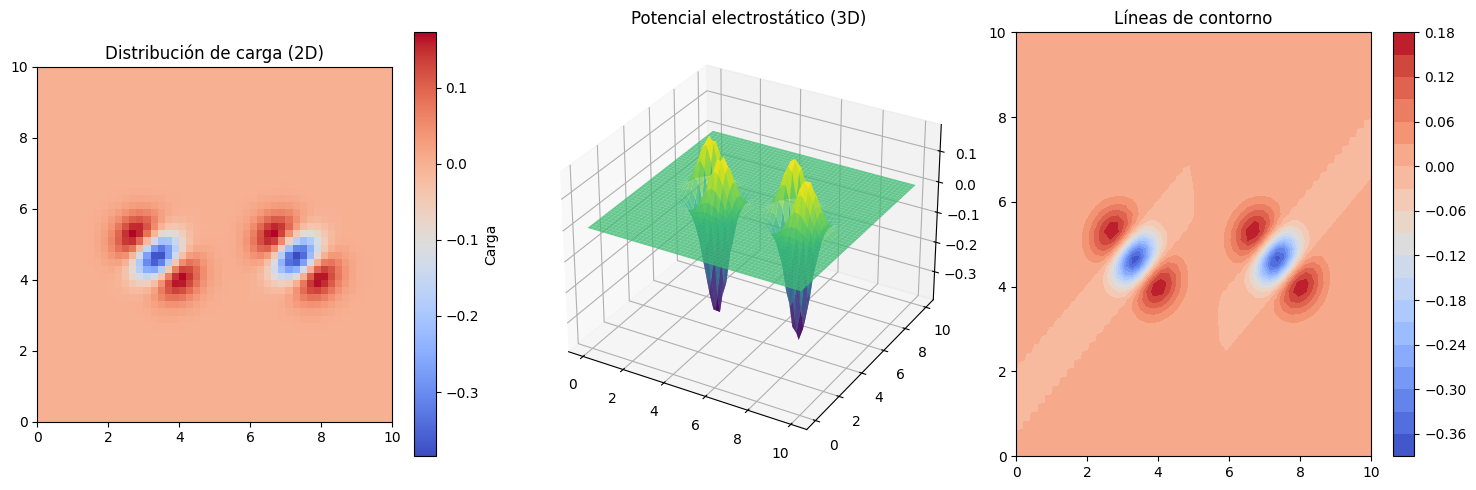

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Distribución de carga gaussiana 
def carga_gaussiana(x, y, x0, y0, sigma, charge):
    return charge * np.exp(-((x - x0)**2 + (y - y0)**2) / (2 * sigma**2))

# Malla 50x50 
def malla(size=50):
    x = np.linspace(0, 10, size)
    y = np.linspace(0, 10, size)
    xx, yy = np.meshgrid(x, y)
    
    # Inicializar la malla de carga
    malla = np.zeros((size, size))
    
    # Parámetros de los átomos 
    sigma = 0.5  
    q_h = +0.5   # Carga del hidrógeno 
    q_o = -1.0   # Carga del oxígeno 
    
    # Molécula 1
    malla += carga_gaussiana(xx, yy, 3.0, 5.0, sigma, q_h)  # H1
    malla += carga_gaussiana(xx, yy, 3.7, 4.3, sigma, q_h)  # H2
    malla += carga_gaussiana(xx, yy, 3.35, 4.65, sigma, q_o)  # O
    
    # Molécula 2
    malla += carga_gaussiana(xx, yy, 7.0, 5.0, sigma, q_h)  # H1
    malla += carga_gaussiana(xx, yy, 7.7, 4.3, sigma, q_h)  # H2
    malla += carga_gaussiana(xx, yy, 7.35, 4.65, sigma, q_o)  # O
    
    return malla

def plot_distribucion_carga(malla):
    fig = plt.figure(figsize=(15, 5))
    
    # Gráfico 2D
    ax1 = fig.add_subplot(131)
    im = ax1.imshow(malla, cmap="coolwarm", origin="lower", extent=[0, 10, 0, 10])
    ax1.set_title("Distribución de carga (2D)")
    plt.colorbar(im, ax=ax1, label="Carga")
    
    # Gráfico 3D
    ax2 = fig.add_subplot(132, projection="3d")
    x = np.linspace(0, 10, 50)
    y = np.linspace(0, 10, 50)
    xx, yy = np.meshgrid(x, y)
    ax2.plot_surface(xx, yy, malla, cmap="viridis", rstride=1, cstride=1, alpha=0.8, linewidth=0)
    ax2.set_title("Potencial electrostático (3D)")
    
    # Contorno 2D
    ax3 = fig.add_subplot(133)
    contour = ax3.contourf(xx, yy, malla, levels=20, cmap="coolwarm")
    ax3.set_title("Líneas de contorno")
    plt.colorbar(contour, ax=ax3)
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    malla_cargas = malla(50)
    df = pd.DataFrame(malla_cargas)
    df.to_csv("distribucion_carga2.csv", index=False, header=False, float_format="%.4f")
    plot_distribucion_carga(malla_cargas)

# Visualización del potencial generado por poisson.c
Observamos un gráfico en 3D junto con sus líneas de contorno a partir de los datos generados (´poisson_solution.csv´) a partir de la iteración de Jacobi del codigo ´poisson.c´

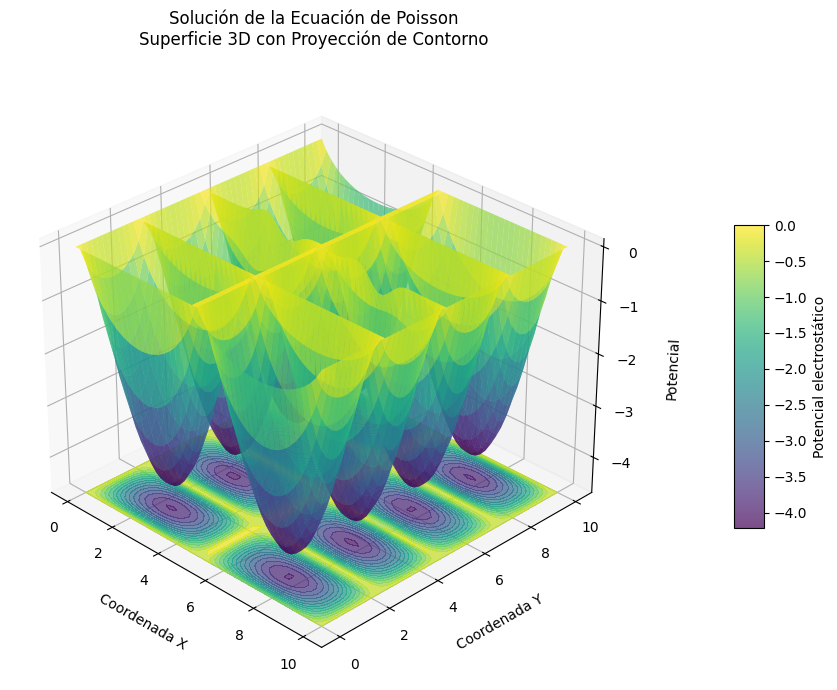

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_potencial(filename):
    # Leer los datos de archivo CSV
    data = np.genfromtxt(filename, delimiter=',')
    
    #malla de coordenadas
    x = np.linspace(0, 10, data.shape[1])
    y = np.linspace(0, 10, data.shape[0])
    xx, yy = np.meshgrid(x, y)
    
    # figura 3D
    fig = plt.figure(figsize=(12, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    # superficie 3D
    surf = ax.plot_surface(xx, yy, data, cmap='viridis', 
                         rstride=1, cstride=1, alpha=0.7,
                         linewidth=0.2, antialiased=True)
    
    #contorno en el plano base
    offset = data.min() - 0.1 * (data.max() - data.min()) 
    contour = ax.contourf(xx, yy, data, zdir='z', offset=offset, 
                         levels=15, cmap='viridis', alpha=0.7)
    
    #barra de color para la superficie
    cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, pad=0.1)
    cbar.set_label('Potencial electrostático')
    
    # etiquetas y título
    ax.set_xlabel('Coordenada X', labelpad=10)
    ax.set_ylabel('Coordenada Y', labelpad=10)
    ax.set_zlabel('Potencial', labelpad=10)
    ax.set_title('Solución de la Ecuación de Poisson\nSuperficie 3D con Proyección de Contorno', pad=20)
    
    # límites para incluir el contorno
    ax.set_zlim(offset, data.max())
    
    # ángulo de visualización
    ax.view_init(elev=30, azim=-45)
    
    # grilla
    ax.grid(True, linestyle='--', alpha=0.5)
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    solution_file = "poisson_solution.csv"
    plot_potencial(solution_file)